###Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HTRU_2[1].csv to HTRU_2[1] (3).csv


In [3]:
dataset = pd.read_csv('HTRU_2[1].csv',names = ('Mean of profile','SD of profile','Excess kurtosis of profile','Skewness of profile','Mean of curve','SD of curve','Excess kurtosis of curve','Skewness of curve','Class'))
dataset.head()

,Mean of profile,SD of profile,Excess kurtosis of profile,Skewness of profile,Mean of curve,SD of curve,Excess kurtosis of curve,Skewness of curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


###Pre-Processing of Dataset

In [4]:
dataset.shape

(17898, 9)

In [5]:
dataset.isnull().sum()

Mean of profile               0
SD of profile                 0
Excess kurtosis of profile    0
Skewness of profile           0
Mean of curve                 0
SD of curve                   0
Excess kurtosis of curve      0
Skewness of curve             0
Class                         0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

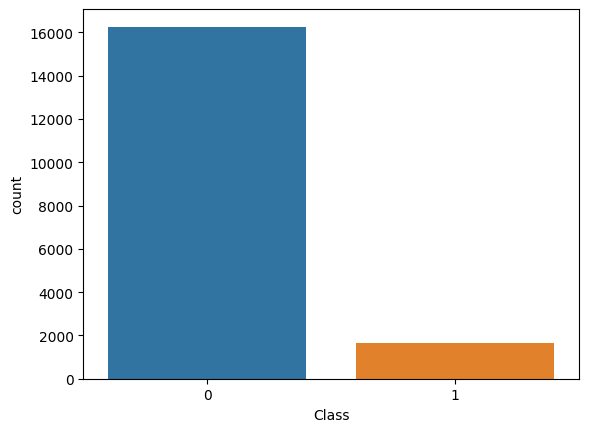

In [6]:
sns.countplot(x = 'Class', data=dataset)

In [7]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [8]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [9]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [10]:
samples

[(       Mean of profile  SD of profile  Excess kurtosis of profile  \
  5018        122.031250      53.870785                    0.058390   
  9653        121.539062      45.725216                   -0.026729   
  10535       125.656250      45.416379                    0.229545   
  4353        116.812500      46.377990                    0.266196   
  4055        121.914062      47.354717                    0.166024   
  ...                ...            ...                         ...   
  9225         68.125000      35.699484                    1.960779   
  13123       131.953125      49.144535                   -0.023566   
  9845        133.164062      55.475470                   -0.094423   
  10799        98.171875      48.805595                    0.311807   
  2732        106.046875      42.075056                    0.421144   
  
         Skewness of profile  Mean of curve  SD of curve  \
  5018             -0.353516       3.408863    25.187309   
  9653              0.287

### Creation of a Fitness Function

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [12]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [13]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.92 Best Kernel =  sigmoid Best Nu =  9.64 Best Epsilon =  4.62
Best Accuracy =  0.95 Best Kernel =  linear Best Nu =  6.4 Best Epsilon =  2.01
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  2.34 Best Epsilon =  1.93
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  1.24 Best Epsilon =  3.41
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  6.07 Best Epsilon =  2.99
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  4.45 Best Epsilon =  2.89
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  6.86 Best Epsilon =  8.89
Best Accuracy =  0.55 Best Kernel =  linear Best Nu =  2.48 Best Epsilon =  1.33
Best Accuracy =  0.91 Best Kernel =  sigmoid Best Nu =  9.7 Best Epsilon =  5.52
Best Accuracy =  0.69 Best Kernel =  linear Best Nu =  4.22 Best Epsilon =  6.23


###Creation of a Result Table

In [14]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.92,sigmoid,9.64,4.62
1,2,0.95,linear,6.40,2.01
2,3,0.91,sigmoid,2.34,1.93
3,4,0.91,sigmoid,1.24,3.41
4,5,0.91,sigmoid,6.07,2.99
5,6,0.91,sigmoid,4.45,2.89
6,7,0.91,sigmoid,6.86,8.89
7,8,0.55,linear,2.48,1.33
8,9,0.91,sigmoid,9.70,5.52
9,10,0.69,linear,4.22,6.23


### Plotting of the Convergence Graph/Linear Curve

In [15]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [16]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [17]:
train_sizes

array([  112,   340,   568,   796,  1023,  1251,  1479,  1707,  1935,
        2162,  2390,  2618,  2846,  3074,  3301,  3529,  3757,  3985,
        4213,  4440,  4668,  4896,  5124,  5352,  5579,  5807,  6035,
        6263,  6491,  6718,  6946,  7174,  7402,  7630,  7857,  8085,
        8313,  8541,  8769,  8996,  9224,  9452,  9680,  9908, 10135,
       10363, 10591, 10819, 11047, 11275])

In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

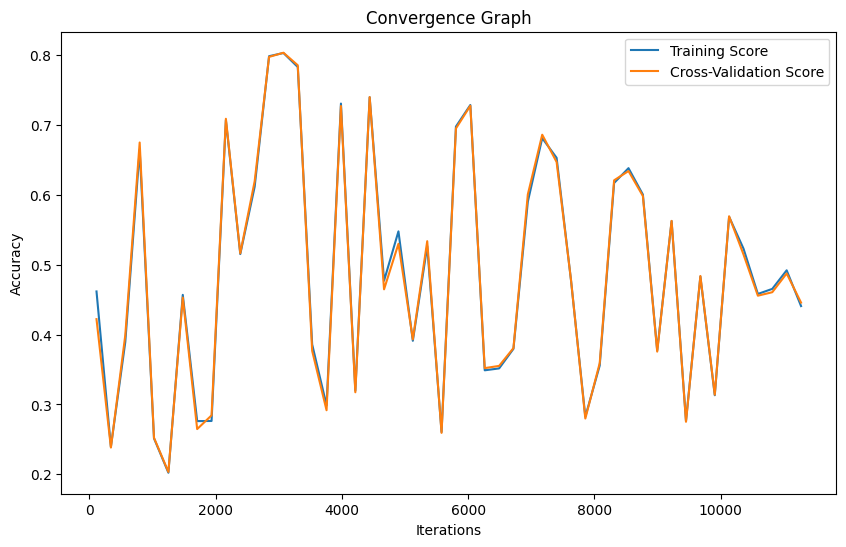

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()